# Iris dataset classification

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [89]:
data = pd.read_csv('iris.csv')

In [90]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [142]:
X = data.drop('variety', axis=1)
Y = data['variety']
#Y.replace(['Setosa', 'Versicolor', 'Virginica'], [1, 2, 3], inplace=True)

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.25,
                                                    random_state=0)

### Correlation

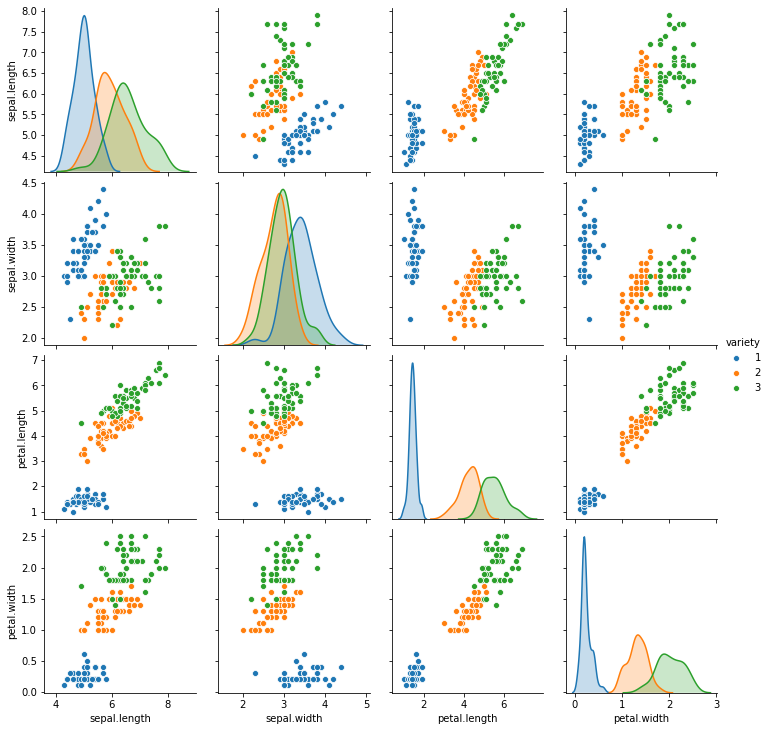

In [116]:
sns.pairplot(data, hue='variety')

In [221]:
corr = data.corr()
corr

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal.length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal.width,0.817941,-0.366126,0.962865,1.000000,0.956547
variety,0.782561,-0.426658,0.949035,0.956547,1.000000


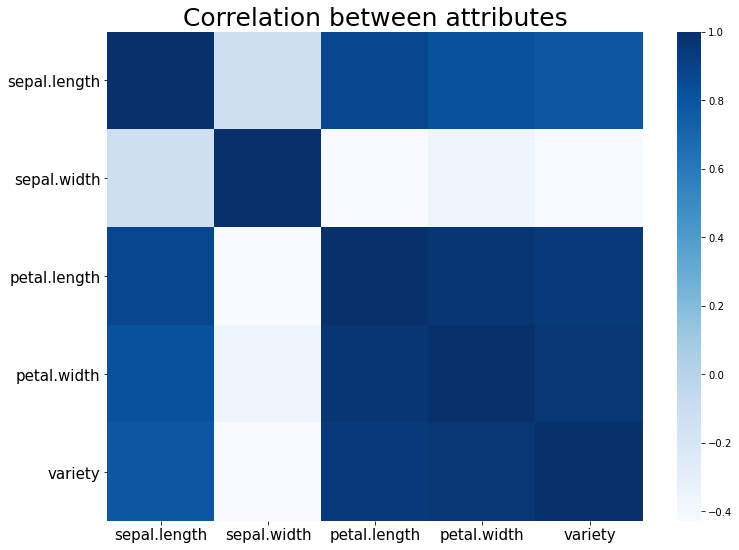

In [231]:
plt.figure(figsize=(12,9))
plt.title('Correlation between attributes', fontsize=25)
heat_map = sns.heatmap(corr, annot=False, cmap = "Blues")
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation = 0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

### Logistic regression

In [117]:
log_model = LogisticRegression(max_iter=200)

In [118]:
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [119]:
score = log_model.score(x_test, y_test)
score

0.9736842105263158

In [120]:
log_pred = log_model.predict(x_test)

In [194]:
#log_df = pd.DataFrame({'Exp': y_test.copy(), 'Pred': log_pred})
#log_df.reset_index(drop=True)

#### Confusion Matrix

In [122]:
log_cm = metrics.confusion_matrix(y_test, log_pred)
log_cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.9736842105263158')

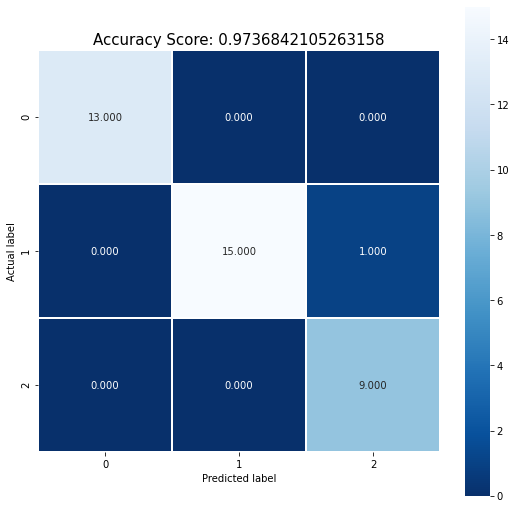

In [123]:
plt.figure(figsize=(9,9))
sns.heatmap(log_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

### Visualization of sepal-only based prediction

In [148]:
sepal = x_train.iloc[:, :2]

In [151]:
log_sepal = LogisticRegression()

In [152]:
log_sepal.fit(sepal, y_train)

LogisticRegression()

In [178]:
log_sepal.score(x_test.iloc[:, :2], y_test)

0.7894736842105263

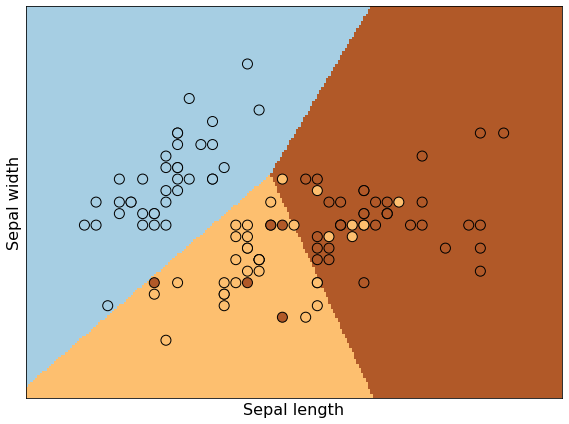

In [170]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
plt.figure(figsize=(9.6, 7.2))
x_min, x_max = sepal.iloc[:, 0].min() - .5, sepal.iloc[:, 0].max() + .5
y_min, y_max = sepal.iloc[:, 1].min() - .5, sepal.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = log_sepal.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(sepal.iloc[:, 0], sepal.iloc[:, 1], s=100, c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length', fontsize=16)
plt.ylabel('Sepal width', fontsize=16)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Visualization of petal-only based prediction

In [248]:
petal_train = x_train.iloc[:, 2:]
petal_test = x_test.iloc[:, 2:]

log_petal = LogisticRegression().fit(petal, y_train)
pred_petal = log_petal.predict(petal_test)
log_petal.score(petal_test, y_test)

0.9736842105263158

In [245]:
f1_score(pred_petal, y_test, average=None)

array([1.        , 0.96774194, 0.94736842])

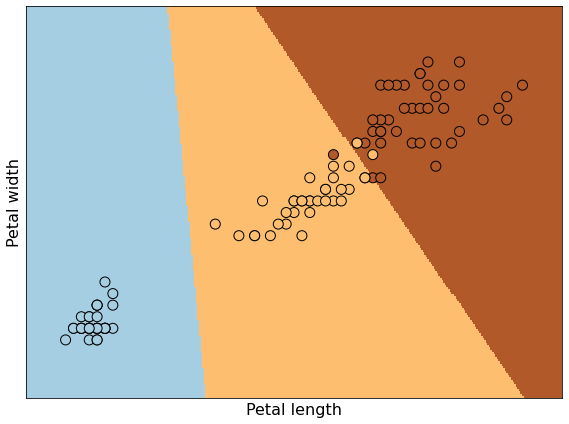

In [246]:
plt.figure(figsize=(9.6, 7.2))
x_min, x_max = petal_train.iloc[:, 0].min() - .5, petal_train.iloc[:, 0].max() + .5
y_min, y_max = petal_train.iloc[:, 1].min() - .5, petal_train.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = log_petal.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(petal_train.iloc[:, 0], petal_train.iloc[:, 1], s=100, c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal length', fontsize=16)
plt.ylabel('Petal width', fontsize=16)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [247]:
petal_df = pd.DataFrame({'Exp': y_test, 'Pred': pred_petal})
petal_df.reset_index(drop=True)

,Exp,Pred
0,3,3
1,2,2
2,1,1
3,3,3
4,1,1
5,3,3
6,1,1
7,2,2
8,2,2
9,2,2


### Naive Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
nb_model = GaussianNB()

In [126]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [127]:
nb_pred = nb_model.predict(x_test)

In [128]:
nb_score = nb_model.score(x_test, y_test)
nb_score

1.0

In [193]:
#nb_df = pd.DataFrame({'Exp': y_test.copy(), 'Pred': nb_pred})
#nb_df.reset_index(drop=True)

In [132]:
nb_cm = metrics.confusion_matrix(y_test, nb_pred)
nb_cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

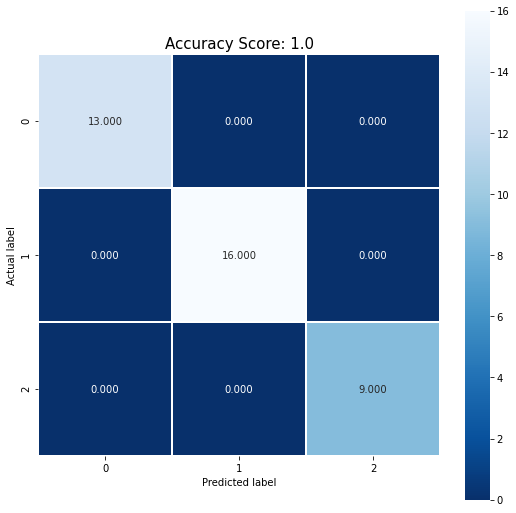

In [133]:
plt.figure(figsize=(9,9))
sns.heatmap(nb_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(nb_score)
plt.title(all_sample_title, size = 15)

### Decision Tree Classifier

In [190]:
#from sklearn import tree

In [191]:
#tree_model = tree.DecisionTreeClassifier()

In [192]:
#tree_model.fit(x_train,y_train)
#tree_pred = tree_model.predict(x_test)
#tree_score = tree_model.score(y_test, tree_pred)

### Support Vector Machine

In [184]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [217]:
svm_model = SVC().fit(x_train,y_train)
svm_pred = svm_model.predict(x_test)
svm_score = svm_model.score(x_test, y_test) 

[LibSVM]

In [218]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': 1}

In [219]:
metrics.accuracy_score(y_test, svm_pred)

0.9736842105263158

In [210]:
svm_score

0.9736842105263158

In [189]:
#svm_df = pd.DataFrame({'Exp': y_test.copy(), 'Pred': svm_pred})
#svm_df.reset_index(drop=True)

In [187]:
svm_cm = metrics.confusion_matrix(y_test, svm_pred)
svm_cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.9736842105263158')

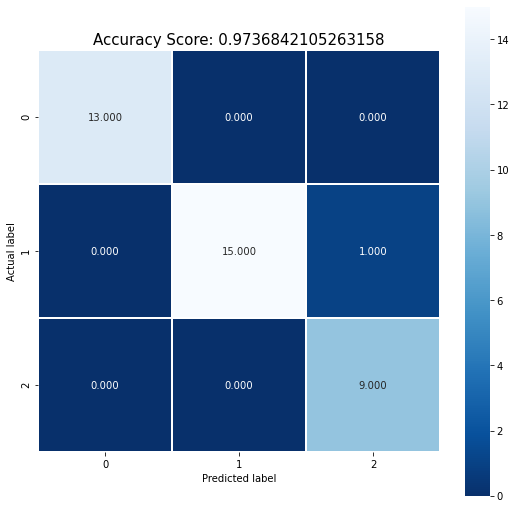

In [188]:
plt.figure(figsize=(9,9))
sns.heatmap(svm_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(svm_score)
plt.title(all_sample_title, size = 15)

## F1 Scores

In [206]:
f1_scores = pd.DataFrame([f1_score(log_pred, y_test, average=None),
                          f1_score(nb_pred, y_test, average=None),
                          f1_score(svm_pred, y_test, average=None)])
f1_scores.index = ['log', 'bayes', 'svm']
f1_scores.columns = ['Setosa', 'Versicolor', 'Virginica']
f1_scores

,Setosa,Versicolor,Virginica
log,1.0,0.967742,0.947368
bayes,1.0,1.000000,1.000000
svm,1.0,0.967742,0.947368
